In [296]:
rnd_seed = 123

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [289]:
#Feature engineered data set
data = pd.read_csv("LQL_features")
data.head(3)

,Sequence,label,A,C,D,E,F,G,H,I,...,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20
0,AACKCDDEGPDIRTAPLTGTVDLGSCNAGWEKCASYYTIIADCCRKKK,0.0,0.125000,0.125000,0.104167,0.041667,0.000000,0.083333,0.000000,0.062500,...,0.187500,0.291667,0.416667,0.520833,0.791667,0.083333,0.166667,0.333333,0.666667,1.0
1,AADAPAQLDPAGEKLYRSACVVCHASGVANAPKLGDKQAWAPFLAQ...,0.0,0.275862,0.022989,0.068966,0.022989,0.011494,0.091954,0.011494,0.000000,...,0.080460,0.275862,0.436782,0.666667,0.850575,0.034483,0.160920,0.425287,0.735632,1.0
2,AAKKTVTKADLVDQVAQATGLKKKDVKAMVDALLAKVEEALANGSK...,0.0,0.145833,0.000000,0.052083,0.041667,0.031250,0.072917,0.000000,0.020833,...,0.052083,0.197917,0.520833,0.677083,0.906250,0.031250,0.260417,0.614583,0.781250,1.0


In [297]:
#Spit Features and Labels for ML models
data.dropna(inplace=True)
x_data = data.drop(columns=["Sequence","label"])
y_data = data["label"]
print('X shape', x_data.shape)
print('Y shape', y_data.shape)

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=123)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)



X shape (5581, 83)
Y shape (5581,)
X_train shape =  (5022, 83)
y_train shape =  (5022,)
X_test shape =  (559, 83)
y_test shape =  (559,)


###  Decision Trees Hyperparameters
##### 1) Criterion: gini > entropy
##### 2) Splitter: best > rnd
##### 3) Max Depth =  9 (f1 = 0.8218)
##### 4) Min_samples_split = Default(2) 
##### 5) Min_samples_leaf = Default(1) 
##### 6) min_weight_frac = Default (0.0) 
##### 7) Number of Features = 61, (f1 = 0.8347)

#### Best combo: depth = 10, num_feat = 61, (f1=0.8376)##

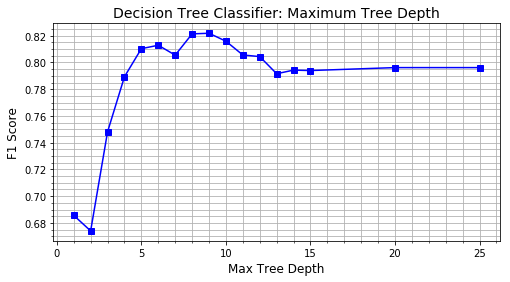

In [291]:
# Tuning Maximum Depth

depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]
all_scores =[]

for depth in depths:
    clf = DecisionTreeClassifier(max_depth = depth, random_state=123)
    scores = cross_val_score(clf,X_train,y_train,scoring='f1',cv=10)
    avg_score = np.mean(scores)
    all_scores.append(avg_score)
    
plt.figure(figsize=(8,4))
plt.plot(depths,all_scores,'b-s')
plt.xlabel('Max Tree Depth',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Decision Tree Classifier: Maximum Tree Depth',fontsize=14)
plt.grid(which='both')
plt.minorticks_on()
plt.show()
    
    

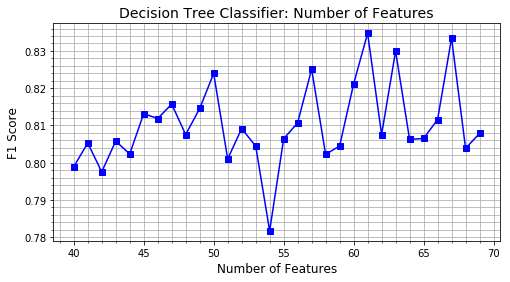

In [292]:
# Tuning Number of features for best split

#After initial trials, observed that it should be somewhere between 40-70 features
num_feat = np.arange(40,70)
all_scores =[]

for feat in num_feat:
    clf = DecisionTreeClassifier(max_depth = 9, max_features = feat, random_state=123)
    scores = cross_val_score(clf,X_train,y_train,scoring='f1',cv=10)
    avg_score = np.mean(scores)
    all_scores.append(avg_score)
    
plt.figure(figsize=(8,4))
plt.plot(num_feat,all_scores,'b-s')
plt.xlabel('Number of Features',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Decision Tree Classifier: Number of Features',fontsize=14)
plt.grid(which='both')
plt.minorticks_on()
plt.show()


In [312]:
# Best DT Model after hyperparameter tuning:

#Training
clf = DecisionTreeClassifier(max_depth =10,max_features=61,random_state=123)
clf.fit(X_train,y_train)
scores = cross_val_score(clf,X_train,y_train,scoring='f1',cv=10)
avg_score = np.mean(scores)
print('DT Training F1 Score = ', avg_score)

#Test
test_predict = clf.predict(X_test)
test_score = f1_score(test_predict,y_test)
print('DT Test F1 Score = ', test_score)

DT Training F1 Score =  0.8376854640842349
DT Test F1 Score =  0.8311688311688312


### Random Forest Hyperparameters

##### 1) Max Tree Depth = 14   (0.8765)
##### 2) Number of trees = 72  (0.8823)


#### Best combo: depth = 14, num_trees = 72, (f1=0.9041)##

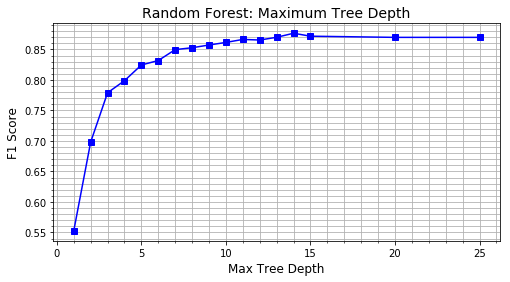

In [304]:
# Tuning Maximum Depth

depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]
all_scores =[]

for depth in depths:
    clf = RandomForestClassifier(n_estimators=100,max_depth = depth, random_state=123)
    scores = cross_val_score(clf,X_train,y_train,scoring='f1',cv=10)
    avg_score = np.mean(scores)
    all_scores.append(avg_score)
    
plt.figure(figsize=(8,4))
plt.plot(depths,all_scores,'b-s')
plt.xlabel('Max Tree Depth',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Random Forest: Maximum Tree Depth',fontsize=14)
plt.grid(which='both')
plt.minorticks_on()
plt.show()
    

In [305]:
max(all_scores)

0.8764973346984627

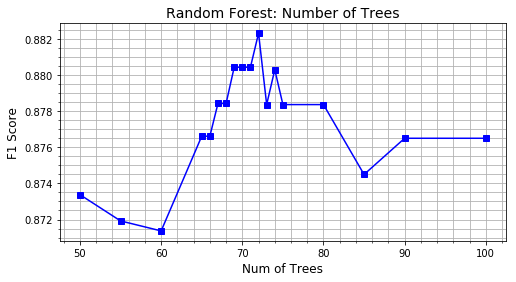

In [310]:
# Tuning Num Trees

num_trees = [50,55,60,65,66,67,68,69,70,71,72,73,74,75,80,85,90,100]
all_scores =[]

for trees in num_trees:
    clf = RandomForestClassifier(n_estimators=trees,max_depth = 14, random_state=123)
    scores = cross_val_score(clf,X_train,y_train,scoring='f1',cv=10)
    avg_score = np.mean(scores)
    all_scores.append(avg_score)
    
plt.figure(figsize=(8,4))
plt.plot(num_trees,all_scores,'b-s')
plt.xlabel('Num of Trees',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.title('Random Forest: Number of Trees',fontsize=14)
plt.grid(which='both')
plt.minorticks_on()
plt.show()
    

In [311]:
max(all_scores)

0.8823106026592897

In [313]:
# Best RF Model after hyperparameter tuning:

#Training
clf = RandomForestClassifier(n_estimators=72,max_depth = 14, random_state=123)
clf.fit(X_train,y_train)
scores = cross_val_score(clf,X_train,y_train,scoring='f1',cv=10)
avg_score = np.mean(scores)
print('RF Training F1 Score = ', avg_score)

#Test
test_predict = clf.predict(X_test)
test_score = f1_score(test_predict,y_test)
print('RF Test F1 Score = ', test_score)

RF Training F1 Score =  0.8823106026592897
RF Test F1 Score =  0.9041095890410958
